##### Audio Classification Using Machine Learning
##### dataset url https://urbansounddataset.weebly.com/urbansound8k.html

In [1]:
!pip install librosa

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
filename='UrbanSound8K/dog_bark.wav'

In [4]:
import IPython.display as ipd
import librosa
import librosa.display

In [5]:
!dir

 Volume in drive D is Data
 Volume Serial Number is C82C-6C6B

 Directory of d:\Codes\Jupyter\AudioClassification

05/14/2021  08:28 PM    <DIR>          .
05/14/2021  08:28 PM    <DIR>          ..
05/14/2021  06:09 PM    <DIR>          .ipynb_checkpoints
05/14/2021  05:48 PM    <DIR>          .vscode
05/14/2021  08:30 PM         2,379,058 Audio_Classification.ipynb
05/14/2021  06:42 PM            35,149 LICENSE
05/14/2021  06:42 PM           151,197 Part 2- Audio Classification Data Preprocessing And Model Creation.ipynb
05/14/2021  06:42 PM           146,754 Part 2- Audio Classification Data Preprocessing.ipynb
05/14/2021  06:42 PM                22 README.md
05/14/2021  08:23 PM    <DIR>          UrbanSound8K
               5 File(s)      2,712,180 bytes
               5 Dir(s)  1,992,845,615,104 bytes free


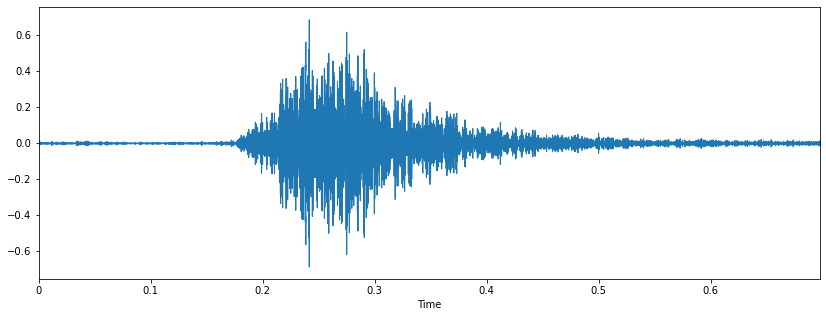

In [7]:
### Dog Sound
plt.figure(figsize=(14,5))
librosa_audio_data,librosa_sample_rate=librosa.load(filename)
librosa.display.waveplot(librosa_audio_data,sr=librosa_sample_rate)
ipd.Audio(filename)

In [9]:
librosa_sample_rate


22050

In [10]:
import pandas as pd

metadata=pd.read_csv('UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head(10)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
5,100263-2-0-143.wav,100263,71.500000,75.500000,1,5,2,children_playing
6,100263-2-0-161.wav,100263,80.500000,84.500000,1,5,2,children_playing
7,100263-2-0-3.wav,100263,1.500000,5.500000,1,5,2,children_playing
8,100263-2-0-36.wav,100263,18.000000,22.000000,1,5,2,children_playing
9,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn


In [11]:
### Check whether the dataset is imbalanced
metadata['class'].value_counts()

children_playing    1000
engine_idling       1000
air_conditioner     1000
dog_bark            1000
street_music        1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64

### Extract Features
Here we will be using Mel-Frequency Cepstral Coefficients(MFCC) from the audio 
samples.
The MFCC summarises the frequency distribution across the window size, so it is possible to analyse both the frequency and time characteristics of the sound. These audio representations will allow us to identify features for classification.

In [12]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 31)


In [14]:
audio_dataset_path='UrbanSound8K/audio/'

In [15]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [17]:

import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

0it [00:00, ?it/s]Collecting tqdm
3554it [04:35, 11.55it/s]C:\Users\subha\anaconda3\envs\ML\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1323
  warnings.warn(
8326it [10:29, 21.39it/s]C:\Users\subha\anaconda3\envs\ML\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1103
  warnings.warn(
C:\Users\subha\anaconda3\envs\ML\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1523
  warnings.warn(
8732it [10:57, 13.29it/s]


In [18]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-215.79301, 71.66612, -131.81377, -52.091328,...",dog_bark
1,"[-424.68677, 110.56227, -54.148235, 62.01073, ...",children_playing
2,"[-459.56467, 122.800354, -47.92471, 53.265694,...",children_playing
3,"[-414.55377, 102.896904, -36.66495, 54.18041, ...",children_playing
4,"[-447.397, 115.0954, -53.809113, 61.608585, 1....",children_playing


In [53]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [54]:
X.shape

(8732, 40)

In [55]:
### Label Encoding
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [57]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [56]:
y.shape

(8732, 10)

In [58]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [59]:
X_train

array([[-1.3183614e+02,  1.1397464e+02, -2.3956861e+01, ...,
         3.3314774e+00, -1.4786109e+00,  2.8736603e+00],
       [-1.4074220e+01,  9.1916939e+01, -8.6787214e+00, ...,
        -3.3844023e+00, -5.2119040e+00, -1.5936136e+00],
       [-4.9532028e+01,  1.5521857e-01, -2.0369110e+01, ...,
         2.0491767e+00, -8.0537474e-01,  2.7793026e+00],
       ...,
       [-4.2699332e+02,  9.2890656e+01,  3.0233388e+00, ...,
         8.6335975e-01,  6.4766806e-01,  7.8490508e-01],
       [-1.4607024e+02,  1.3709459e+02, -3.4298344e+01, ...,
         1.3777870e+00, -1.9530845e+00, -8.9652133e-01],
       [-4.2167450e+02,  2.1169032e+02,  2.6820304e+00, ...,
        -5.1484952e+00, -3.6400862e+00, -1.3321608e+00]], dtype=float32)

In [60]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [61]:
X_train.shape

(6985, 40)

In [62]:
X_test.shape

(1747, 40)

In [63]:
y_train.shape

(6985, 10)

In [64]:
y_test.shape

(1747, 10)

### Model Creation

In [65]:
import tensorflow as tf
print(tf.__version__)

2.5.0


In [66]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [67]:
### No of classes
num_labels=y.shape[1]

In [68]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [69]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 100)               4100      
_________________________________________________________________
activation_4 (Activation)    (None, 100)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 200)               20200     
_________________________________________________________________
activation_5 (Activation)    (None, 200)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 100)              

In [70]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [71]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 199
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

: 0.7832 - val_accuracy: 0.7556

Epoch 00103: val_loss did not improve from 0.76114
Epoch 104/199
219/219 [==============================] - 0s 2ms/step - loss: 0.9381 - accuracy: 0.6860 - val_loss: 0.7463 - val_accuracy: 0.7584

Epoch 00104: val_loss improved from 0.76114 to 0.74631, saving model to saved_models\audio_classification.hdf5
Epoch 105/199
219/219 [==============================] - 0s 2ms/step - loss: 0.9710 - accuracy: 0.6773 - val_loss: 0.7516 - val_accuracy: 0.7739

Epoch 00105: val_loss did not improve from 0.74631
Epoch 106/199
219/219 [==============================] - 0s 2ms/step - loss: 0.9510 - accuracy: 0.6858 - val_loss: 0.7634 - val_accuracy: 0.7607

Epoch 00106: val_loss did not improve from 0.74631
Epoch 107/199
219/219 [==============================] - 1s 3ms/step - loss: 0.9483 - accuracy: 0.6838 - val_loss: 0.7689 - val_accuracy: 0.7539

Epoch 00107: val_loss did not improve from 0.74631
Epoch 108/199
219/219 [==============================] - 0s 2ms/step

In [72]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.8002289533615112


In [73]:
prediction_feature.shape

(1, 40)

In [74]:
X_test[1]

array([-466.1843    ,    1.5388278 ,  -34.397358  ,   35.715332  ,
        -15.16693   ,  -18.850813  ,   -0.74158096,  -15.99989   ,
        -21.354332  ,    7.6506834 ,  -29.031452  ,  -19.142824  ,
         -2.6798916 ,   -8.466884  ,  -14.7660475 ,   -7.004778  ,
         -7.103754  ,    8.887754  ,   14.911873  ,   21.47102   ,
         21.336626  ,    0.91695195,  -18.795404  ,   -5.0017214 ,
         -0.7015264 ,    2.91399   ,   -6.710599  ,  -16.638536  ,
         -9.821647  ,   12.8619585 ,    0.655298  ,  -23.953394  ,
        -15.200551  ,    9.21079   ,   10.419801  ,   -0.5791614 ,
         -1.2440349 ,   17.722294  ,   13.837573  ,   -5.164349  ],
      dtype=float32)

In [75]:
model.predict_classes(X_test)

C:\Users\subha\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([5, 3, 4, ..., 1, 9, 5], dtype=int64)

### Testing Some Test Audio Data

Steps
- Preprocess the new audio data
- predict the classes
- Invere transform your Predicted Label

In [78]:
def result(filename):
    audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

    #print(mfccs_scaled_features)
    mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
    #print(mfccs_scaled_features)
    #print(mfccs_scaled_features.shape)
    predicted_label=model.predict_classes(mfccs_scaled_features)
    #print(predicted_label)
    prediction_class = labelencoder.inverse_transform(predicted_label) 
    return prediction_class

In [79]:
print(result("UrbanSound8K/dog_bark.wav"))

['dog_bark']
C:\Users\subha\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [84]:
print(result("UrbanSound8K/siren.wav"))

['siren']


In [85]:
print(result("UrbanSound8K/drilling.wav"))

['drilling']
